## Multiple Scattering: EGS5 vs Geant4
#### Omar Moreno, SLAC National Accelerator Laboratory

This notebook is used to compare the default multiple scattering models used by EGS5 and Geant4 10.5.0.  Events were generated by firing a single electron through a 20 um, Tungsten target. EGS5 events were generated using the Fortran program found at https://github.com/omar-moreno/hps-analysis/tree/master/egs5. Generation of Geant4 events was done using SLIC built with Geant 10.5.0.  The following macro was used to generate the events: 
```
```

Starting with Geant4 9.6.0, the default multiple scattering model used above 100 MeV is WentzelVI model.  Below 100 MeV, the Urban model is still used. The initial concern was with the Urban model as shown below: 
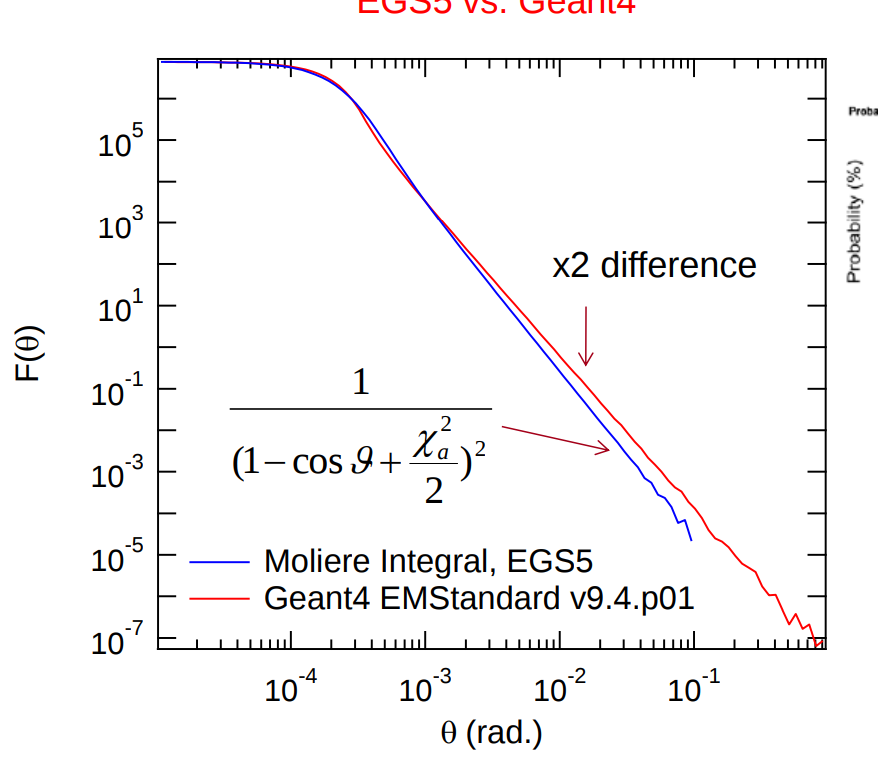

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
egs5_4pt5_df = pd.read_csv('ms_4pt55_20um.csv')
egs5_2pt2_df = pd.read_csv('ms_2pt2_4um.csv')
g4_4pt55_df  = pd.concat(map(pd.read_csv, 
                         ['ms_geant10pt5_00%s.csv' % i for i in range(1, 8)]), 
                         ignore_index=True)
g4_2pt2_df = pd.concat(map(pd.read_csv, 
                       ['ms_geant10pt5_2pt2_00%s.csv' % i for i in range(1, 6)]), 
                       ignore_index=True)
print(len(egs5_4pt5_df))
print(len(g4_4pt55_df))
print(len(g4_2pt2_df))

99980399
70000000
41900952


In [3]:
def draw_histogram1D(ax, var, xmin, xmax, bins, **kargs): 
    
    bins = np.linspace(xmin, xmax, bins)
    raw_values, xedges = np.histogram(var, bins=bins)
    bin_centers = (xedges + (xedges[1] - xedges[0])/2)[:-1]
    
    err_min = np.zeros(len(raw_values))
    err_max = np.zeros(len(raw_values))
    if 'errors' in kargs: 
        err_min, err_max = errors(values)
        
    if 'norm' in kargs:
        if kargs['norm'] == 1:
            integral = np.sum(raw_values)
        else: 
            integral = kargs['norm']
            ax.set_ylabel('Event Fraction')
            
        values = raw_values/integral
        
        if 'errors' in kargs: 
            err_min = np.array(err_min)/integral
            err_max = np.array(err_max)/integral
    else: values = raw_values
    
    if 'x_label' in kargs: 
        ax.set_xlabel(kargs['x_label'], fontsize=30)
        
    if 'y_label' in kargs: 
        ax.set_ylabel(kargs['y_label'], fontsize=30)
    
    color = 'forestgreen'
    if 'color' in kargs:
        color = kargs['color']

    edgecolor = 'darkgreen'
    if 'edgecolor' in kargs: 
        edgecolor = kargs['edgecolor']
    
    label = ''
    if 'label' in kargs: 
        label = kargs['label']
    
    matplotlib.rcParams.update({'font.size': 22})
    
    ax.hist(bin_centers, bins=xedges, weights=values, alpha=0.3, 
            linewidth=2, color=color, edgecolor=edgecolor, label=label )
    
    ax.minorticks_on()
    ax.tick_params(which='major', length=10, width=2, direction='inout', labelsize=30)
    ax.tick_params(which='minor', length=5, width=2, direction='in', labelsize=30)

    ax.set_title('HPS Simulation Internal', x=.75, fontweight='bold')

    return values, raw_values, bin_centers

def ratio_error(ax, ratio, bins1, bins2):
    
    errsq_1 = np.sqrt(bins1)/bins1
    errsq_2 = np.sqrt(bins2)/bins2
    

    err = ratio*np.sqrt(errsq_1*errsq_1 + errsq_2*errsq_2)
    errmin = ratio - err
    errmax = ratio + err

    return errmin, errmax

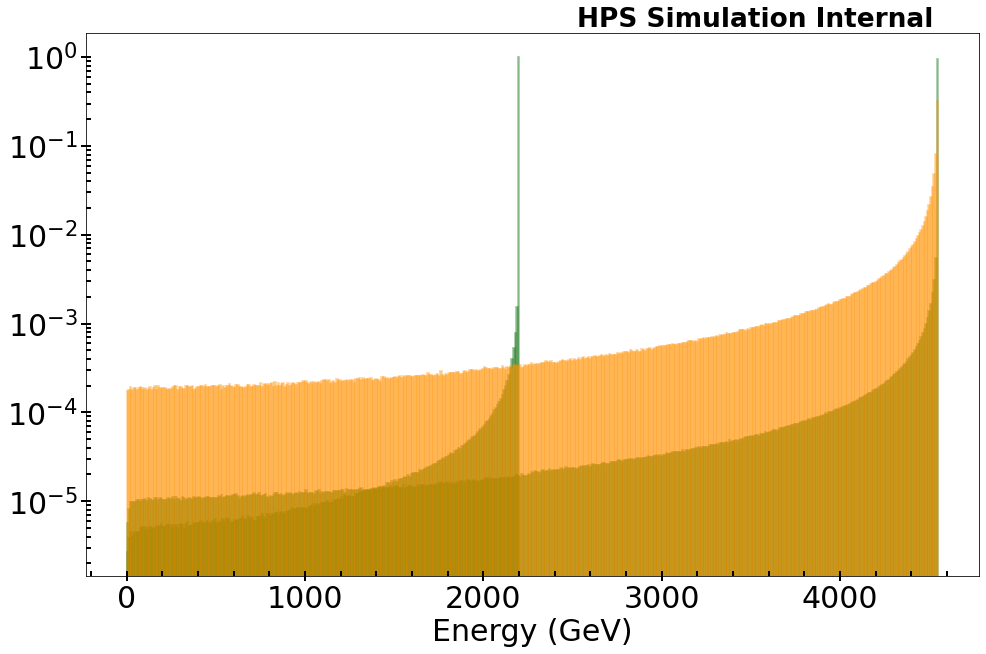

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, egs5_4pt5_df[' Energy (GeV)'], 0, 4550, 501, 
                 x_label='Energy (GeV)', norm=1, 
                label='Inclusive')
draw_histogram1D(ax, egs5_2pt2_df[' Energy (GeV)'], 0, 4550, 501, 
                 x_label='Energy (GeV)', norm=1, 
                label='Inclusive')
draw_histogram1D(ax, g4_4pt55_df['p']*1000, 0, 4550, 501, 
                 x_label='Energy (GeV)', norm=1,
                 edgecolor='darkorange', color='orange',
                label='Inclusive')
ax.set_yscale('log')

/home/omoreno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/home/omoreno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/home/omoreno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
/home/omoreno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/home/omoreno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide
/home/omoreno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide


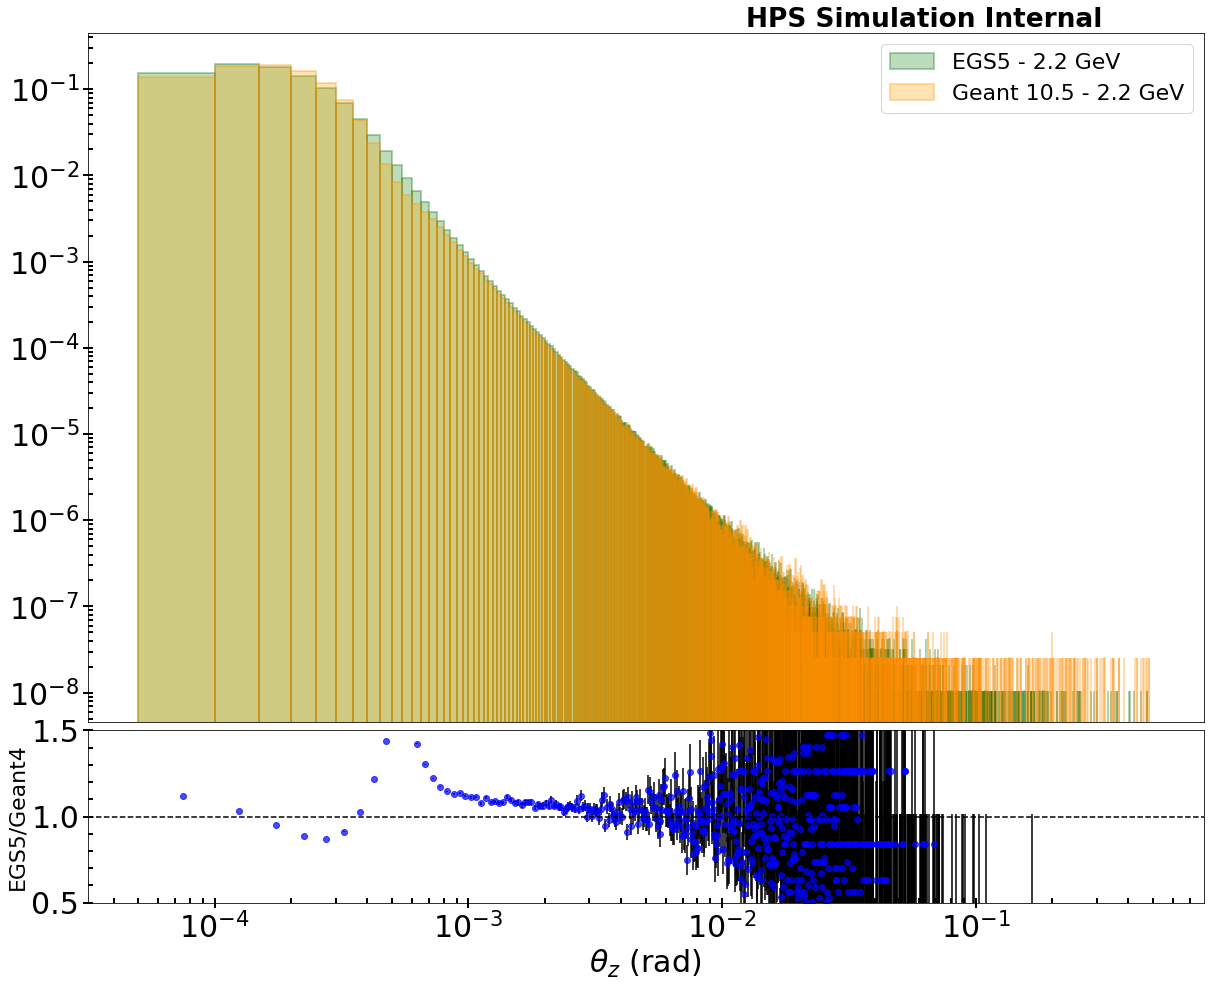

In [5]:
matplotlib.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(20, 16), facecolor='white')
gs = fig.add_gridspec(2, 1, height_ratios=(8,2), hspace=0.02)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0], sharex=ax0)

egs2pt2v, egs2pt2v_raw, egs2pt2b = draw_histogram1D(ax0, egs5_2pt2_df[' Theta z (mrad)'], 0.00005, 0.5, 10001, 
                 x_label=r'$\theta_z$ (rad)', norm=1,
                 label='EGS5 - 2.2 GeV')
g410pt5_2pt2v, g410pt5_2pt2v_raw, g410pt5_2pt2b = draw_histogram1D(ax0, g4_2pt2_df['theta_z'], 0.00005, 0.5, 10001, 
                 x_label=r'$\theta_z$ (rad)',
                 edgecolor='darkorange', color='orange', norm=1,
                 label='Geant 10.5 - 2.2 GeV')

ax0.set_yscale('log')
ax0.set_xscale('log')
ax0.get_xaxis().set_visible(False)
ax0.legend()

ax1.plot(egs2pt2b, egs2pt2v/g410pt5_2pt2v, 'o', 
         color='blue', alpha=0.7)
ax1.set_ylabel('EGS5/Geant4', fontsize=22)
ax1.set_ylim(0.5, 1.5)
ax1.axhline(y=1.0, color='black', linestyle='--')
errmin, errmax = ratio_error(ax1, egs2pt2v/g410pt5_2pt2v, egs2pt2v_raw, g410pt5_2pt2v_raw)
ax1.vlines(egs2pt2b, errmin, errmax, color='black')
ax1.set_xlabel(r'$\theta_z$ (rad)', fontsize=30)

ax1.minorticks_on()
ax1.tick_params(which='major', length=10, width=2, direction='inout', labelsize=30)
ax1.tick_params(which='minor', length=5, width=2, direction='in', labelsize=30)

/home/omoreno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/home/omoreno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/home/omoreno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
/home/omoreno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/home/omoreno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide
/home/omoreno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide


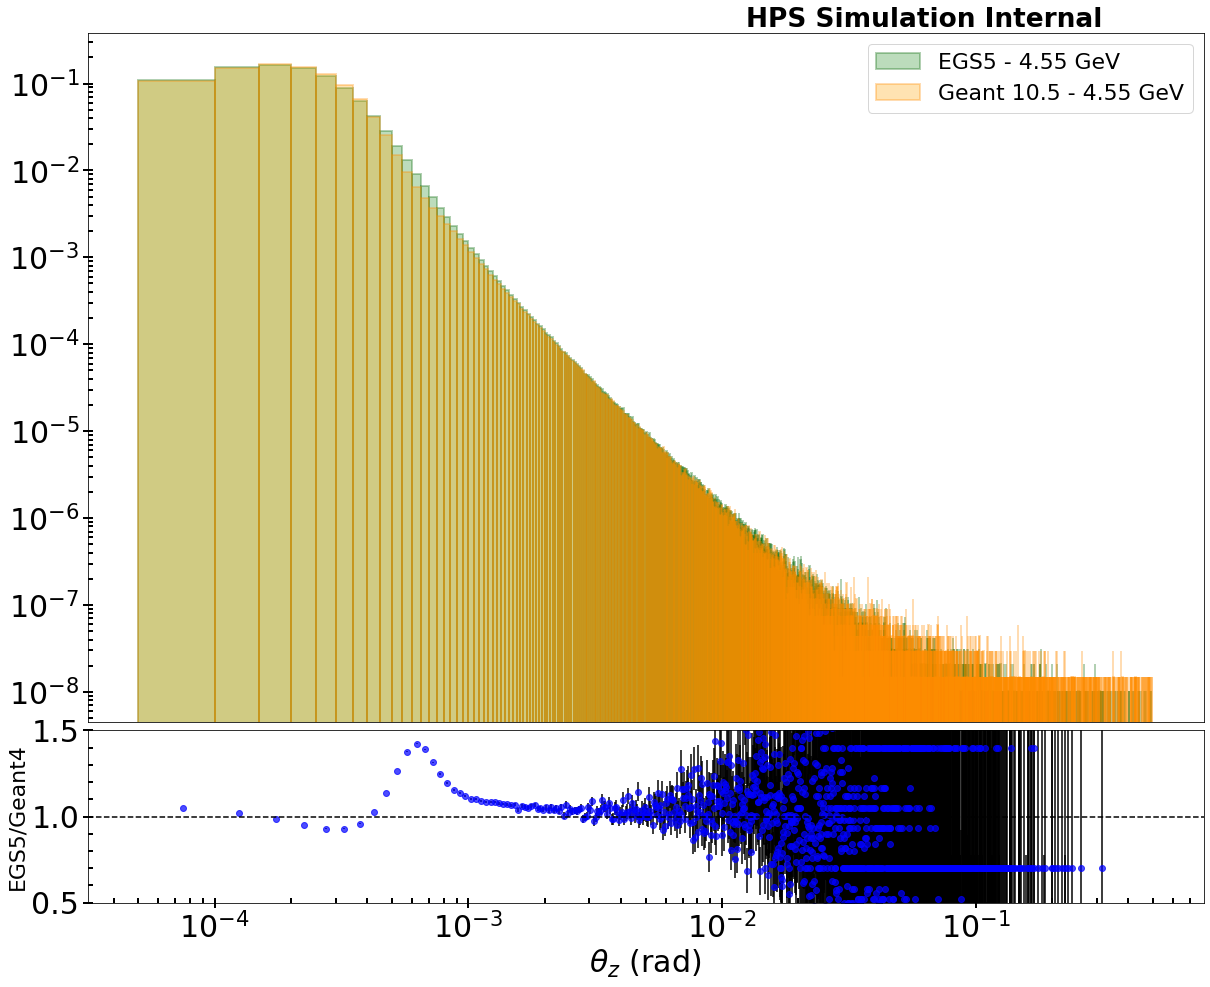

In [6]:
matplotlib.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(20, 16), facecolor='white')
gs = fig.add_gridspec(2, 1, height_ratios=(8,2), hspace=0.02)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0], sharex=ax0)

egs4pt5v, egs4pt5v_raw, egs4pt5b = draw_histogram1D(ax0, egs5_4pt5_df[' Theta z (mrad)'], 0.00005, 0.5, 10001, 
                 x_label=r'$\theta_z$ (rad)', norm=1,
                 label='EGS5 - 4.55 GeV')
g410pt5_4pt55v, g410pt5_4pt55v_raw, g410pt5_4pt55b = draw_histogram1D(ax0, g4_4pt55_df['theta_z'], 0.00005, 0.5, 10001, 
                 x_label=r'$\theta_z$ (rad)',
                 edgecolor='darkorange', color='orange', norm=1,
                 label='Geant 10.5 - 4.55 GeV')

ax0.set_yscale('log')
ax0.set_xscale('log')
ax0.get_xaxis().set_visible(False)
ax0.legend()

ax1.plot(egs4pt5b, egs4pt5v/g410pt5_4pt55v, 'o', 
         color='blue', alpha=0.7)
ax1.set_ylabel('EGS5/Geant4', fontsize=22)
ax1.set_ylim(0.5, 1.5)
ax1.axhline(y=1.0, color='black', linestyle='--')
errmin, errmax = ratio_error(ax1, egs4pt5v/g410pt5_4pt55v, egs4pt5v_raw, g410pt5_4pt55v_raw)
ax1.vlines(egs4pt5b, errmin, errmax, color='black')
ax1.set_xlabel(r'$\theta_z$ (rad)', fontsize=30)

ax1.minorticks_on()
ax1.tick_params(which='major', length=10, width=2, direction='inout', labelsize=30)
ax1.tick_params(which='minor', length=5, width=2, direction='in', labelsize=30)

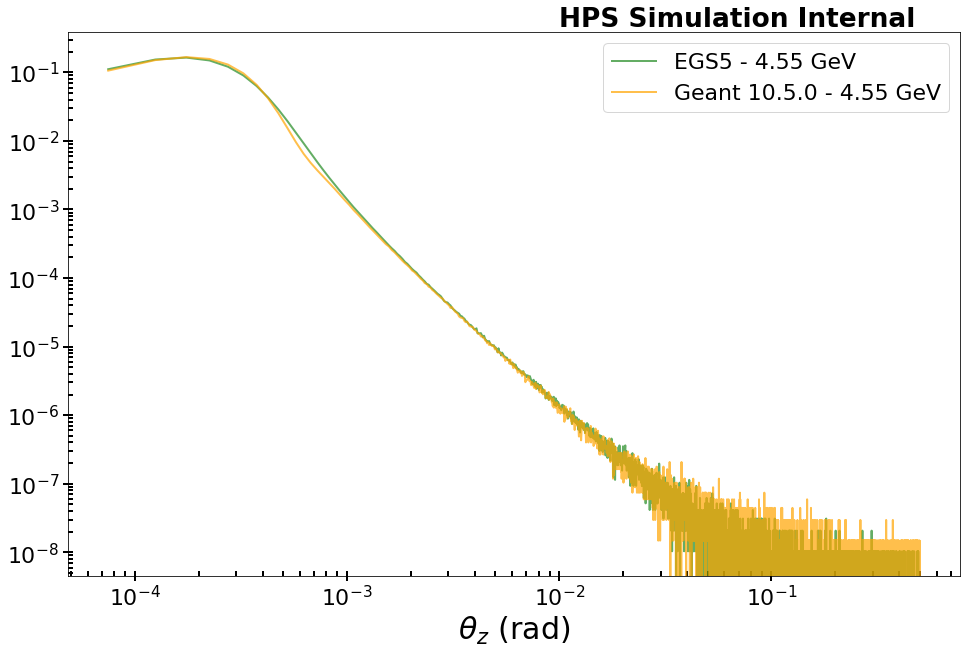

In [7]:
matplotlib.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')

ax.plot(egs4pt5b, egs4pt5v, linewidth=2, color='forestgreen', alpha=0.7, label='EGS5 - 4.55 GeV')
ax.plot(g410pt5_4pt55b, g410pt5_4pt55v, linewidth=2, color='orange', alpha=0.7, label='Geant 10.5.0 - 4.55 GeV')
ax.set_yscale('log')
ax.set_xscale('log')

ax.minorticks_on()
ax.tick_params(which='major', length=10, width=2, direction='inout', labelsize=22)
ax.tick_params(which='minor', length=5, width=2, direction='in', labelsize=22)

ax.set_title('HPS Simulation Internal', x=.75, fontweight='bold')
ax.set_xlabel(r'$\theta_z$ (rad)', fontsize=30)

ax.legend();

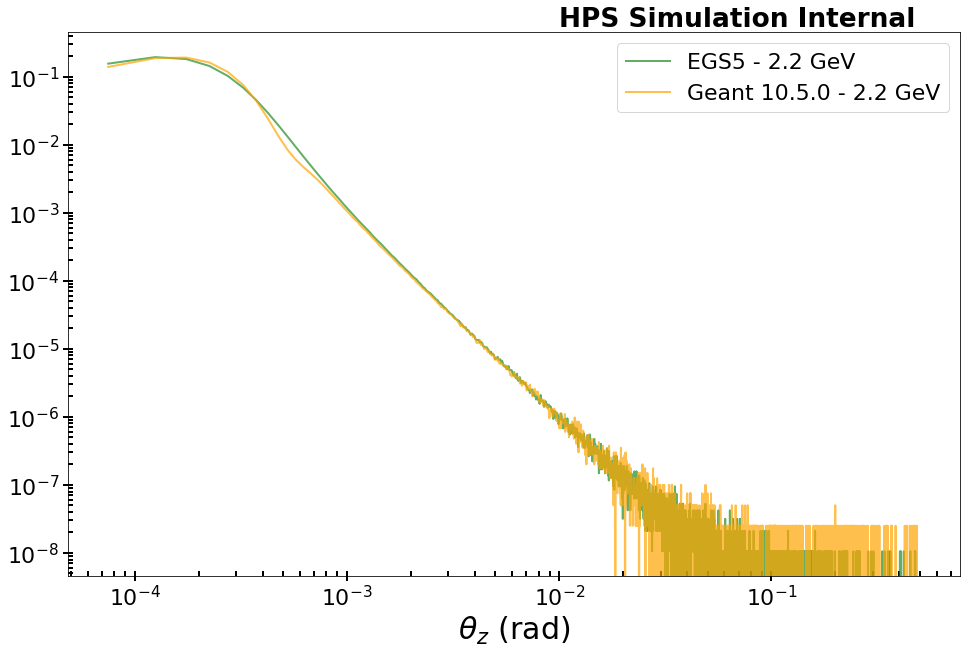

In [8]:
matplotlib.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')


ax.plot(egs2pt2b, egs2pt2v, linewidth=2, color='forestgreen', alpha=0.7, label='EGS5 - 2.2 GeV')
ax.plot(g410pt5_2pt2b, g410pt5_2pt2v, linewidth=2, color='orange', alpha=0.7, label='Geant 10.5.0 - 2.2 GeV')
ax.set_yscale('log')
ax.set_xscale('log')

ax.minorticks_on()
ax.tick_params(which='major', length=10, width=2, direction='inout', labelsize=22)
ax.tick_params(which='minor', length=5, width=2, direction='in', labelsize=22)

ax.set_title('HPS Simulation Internal', x=.75, fontweight='bold')
ax.set_xlabel(r'$\theta_z$ (rad)', fontsize=30)

ax.legend();